# Data prepration in python

# Data reading

In [2]:
import nltk
import pandas as pd
import numpy as np

In [3]:
SMS_data=pd.read_csv('Spam_data.csv',sep='\t',names=['label','text'])

In [4]:
SMS_data.head(n=5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
SMS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
SMS_data['text_len']=SMS_data['text'].apply(len)

In [7]:
SMS_data.head()

,label,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualizing

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE8DE89320>]],
      dtype=object)

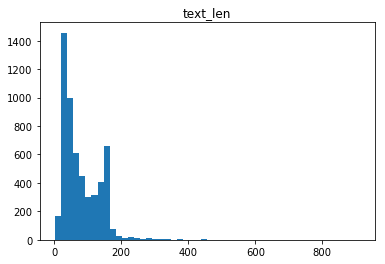

In [9]:
SMS_data.hist(column='text_len',bins=50,figsize=(6,4),grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE8DE3C198>,
      dtype=object)

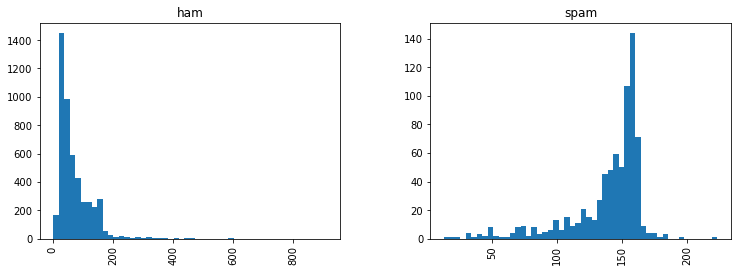

In [10]:
SMS_data.hist(column='text_len',by='label',bins=50,figsize=(12,4))

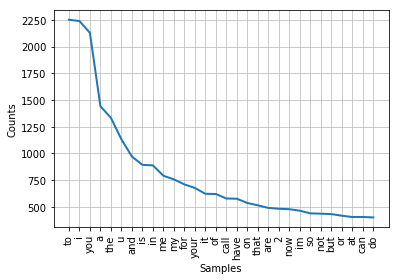

In [12]:
#maketrans make a dictionary of translation table with ordinal representation
#ord(97)=a
#string.punctuation--> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
import string
from nltk.corpus import stopwords
txt = " ".join(SMS_data['text'])
translator = str.maketrans('', '', string.punctuation)
words=txt.translate(translator).lower().split()
fd = nltk.FreqDist(words)
fd.plot(30,cumulative=False)

In [13]:
fd.most_common(20)

[('to', 2251),
 ('i', 2239),
 ('you', 2128),
 ('a', 1442),
 ('the', 1333),
 ('u', 1132),
 ('and', 971),
 ('is', 893),
 ('in', 888),
 ('me', 791),
 ('my', 757),
 ('for', 710),
 ('your', 677),
 ('it', 622),
 ('of', 620),
 ('call', 578),
 ('have', 576),
 ('on', 536),
 ('that', 514),
 ('are', 490)]

In [14]:
w_list=[w for w in words if w not in stopwords.words('english')]

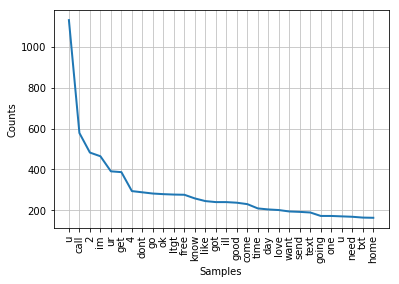

In [15]:
all_words=nltk.FreqDist(w_list)
all_words.plot(30,cumulative=False)

# Classifier Algorithm

In [16]:
#convert dictionary to the list
word_common=all_words.most_common()[:3000]

In [17]:
word_common[:10]

[('u', 1132),
 ('call', 578),
 ('2', 482),
 ('im', 464),
 ('ur', 390),
 ('get', 386),
 ('4', 293),
 ('dont', 287),
 ('go', 281),
 ('ok', 278)]

In [18]:
word_features=[w[0] for w in word_common]

In [19]:
SMS_data.values[0]

array(['ham',
       'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       111], dtype=object)

In [20]:
#index the word_common for each SMS
def find_feature(document):
    features={}
    words=document.split()
    for w in word_common:
        features[w[0]]=(w[0] in words)
    return features

Feature_set=[]
#i=row index
#row values
for i, row in enumerate(SMS_data.values):
    label, text,text_len=row
    Feature_set.append((find_feature(text),label))  

In [21]:
train_set=Feature_set[:3000]
test_set=Feature_set[3000:]

In [22]:
train_set[0]

({'u': False,
  'call': False,
  '2': False,
  'im': False,
  'ur': False,
  'get': False,
  '4': False,
  'dont': False,
  'go': False,
  'ok': False,
  'ltgt': False,
  'free': False,
  'know': False,
  'like': False,
  'got': True,
  'ill': False,
  'good': False,
  'come': False,
  'time': False,
  'day': False,
  'love': False,
  'want': False,
  'send': False,
  'text': False,
  'going': False,
  'one': False,
  'ü': False,
  'need': False,
  'txt': False,
  'home': False,
  'lor': False,
  'see': False,
  'sorry': False,
  'still': False,
  'r': False,
  'back': False,
  'stop': False,
  'n': True,
  'reply': False,
  'today': False,
  'mobile': False,
  'tell': False,
  'new': False,
  'well': False,
  'later': False,
  'hi': False,
  'think': False,
  'da': False,
  'please': False,
  'take': False,
  'phone': False,
  'cant': False,
  'week': False,
  'night': False,
  'claim': False,
  'oh': False,
  'much': False,
  'great': True,
  'hey': False,
  'dear': False,
  'pls': F

In [23]:
classifier=nltk.NaiveBayesClassifier.train(train_set)

In [24]:
print("Naive bayes algorithm accuracy percent:",(nltk.classify.accuracy(classifier,test_set))*100)

Naive bayes algorithm accuracy percent: 96.30637636080871


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "www" appears 238.1  more times as often in spam as it does in ham.

In [25]:
classifier.show_most_informative_features(3000)

Most Informative Features
                      16 = True             spam : ham    =     86.4 : 1.0
                     txt = True             spam : ham    =     78.6 : 1.0
                    draw = True             spam : ham    =     51.8 : 1.0
                  mobile = True             spam : ham    =     47.1 : 1.0
                  pounds = True             spam : ham    =     40.0 : 1.0
                selected = True             spam : ham    =     36.7 : 1.0
                 network = True             spam : ham    =     35.8 : 1.0
                      wk = True             spam : ham    =     35.8 : 1.0
                  offers = True             spam : ham    =     31.6 : 1.0
                   price = True             spam : ham    =     31.6 : 1.0
                customer = True             spam : ham    =     29.8 : 1.0
                  chance = True             spam : ham    =     29.1 : 1.0
                 contact = True             spam : ham    =     27.7 : 1.0

                    0844 = False             ham : spam   =      1.0 : 1.0
         08700621170150p = False             ham : spam   =      1.0 : 1.0
                 tariffs = False             ham : spam   =      1.0 : 1.0
                  upload = False             ham : spam   =      1.0 : 1.0
                     123 = False             ham : spam   =      1.0 : 1.0
                  ladies = False             ham : spam   =      1.0 : 1.0
                    6031 = False             ham : spam   =      1.0 : 1.0
                 members = False             ham : spam   =      1.0 : 1.0
                     021 = False             ham : spam   =      1.0 : 1.0
                   81010 = False             ham : spam   =      1.0 : 1.0
             08452810073 = False             ham : spam   =      1.0 : 1.0
                   among = False             ham : spam   =      1.0 : 1.0
                   69888 = False             ham : spam   =      1.0 : 1.0
                   sport 

                     juz = False            spam : ham    =      1.0 : 1.0
                      mu = False            spam : ham    =      1.0 : 1.0
                    goin = False            spam : ham    =      1.0 : 1.0
                   tired = False            spam : ham    =      1.0 : 1.0
                 showing = False            spam : ham    =      1.0 : 1.0
                    case = False            spam : ham    =      1.0 : 1.0
                       7 = False            spam : ham    =      1.0 : 1.0
                      fr = False            spam : ham    =      1.0 : 1.0
                     dad = False            spam : ham    =      1.0 : 1.0
                   loved = False            spam : ham    =      1.0 : 1.0
                   drink = False            spam : ham    =      1.0 : 1.0
                       … = False            spam : ham    =      1.0 : 1.0
                   loads = False            spam : ham    =      1.0 : 1.0
                    wake 

                  inches = False             ham : spam   =      1.0 : 1.0
                   jason = False             ham : spam   =      1.0 : 1.0
                   voice = False             ham : spam   =      1.0 : 1.0
                  belovd = False             ham : spam   =      1.0 : 1.0
                  armand = False             ham : spam   =      1.0 : 1.0
                  failed = False             ham : spam   =      1.0 : 1.0
                     swt = False             ham : spam   =      1.0 : 1.0
                distance = False             ham : spam   =      1.0 : 1.0
                   bucks = False             ham : spam   =      1.0 : 1.0
                    boat = False             ham : spam   =      1.0 : 1.0
                 station = False             ham : spam   =      1.0 : 1.0
                  summer = False             ham : spam   =      1.0 : 1.0
                      oz = False             ham : spam   =      1.0 : 1.0
                    legs 

                 algarve = False            spam : ham    =      1.0 : 1.0
                     450 = False            spam : ham    =      1.0 : 1.0
                     hrs = False            spam : ham    =      1.0 : 1.0
       govtinstituitions = False            spam : ham    =      1.0 : 1.0
                     tcs = False            spam : ham    =      1.0 : 1.0
                     aah = False            spam : ham    =      1.0 : 1.0
                   vodka = False            spam : ham    =      1.0 : 1.0
                 freemsg = False            spam : ham    =      1.0 : 1.0
     shracomorsglsuplt10 = False            spam : ham    =      1.0 : 1.0
                  blakes = False            spam : ham    =      1.0 : 1.0
                      cc = False            spam : ham    =      1.0 : 1.0
                    june = False            spam : ham    =      1.0 : 1.0
                moralone = False            spam : ham    =      1.0 : 1.0
                     erm 

# Text blob

A sentence could be stating a fact( objective) or expressing an opinion( subjective). Determining this is a classification of a sentence as being objective or subjective
For sentences tagged as subjective in the classification, one could further classify those sentences as expressing a positive or negative sentiment - weeding out objective statements may help improve the performance of sentiment classification into positive and negative sentiment.
So in essence given a sentence - one could first use a classifier to label a sentence as subjective or objective and then do another classification to further classify subjective sentences as either positive or negative.

Note:
research has shown the presence of adjectives and adverbs is usually a good indicator of text subjectivity. In other words, statements that use adjectives like “interesting,” “problematic” and “awesome” might be more likely to convey a subjective point of view than statements that do not include those adjectives.

In [28]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#textblob is on top of nltk but vader is just sentiment library
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# blob does text analytic which can be shown by directory
# such as noun phrase, np_counts, sentiment
analyzer = SentimentIntensityAnalyzer()

In [3]:
f=open("positive1.txt","rb")
txt_pos=f.read().decode('utf-8',errors='ignore')
f.close()
lines_pos=txt_pos.split('\n')

f=open("negative.txt","rb")
txt_neg=f.read().decode('utf-8',errors='ignore')
f.close()
lines_neg=txt_neg.split('\n')

In [4]:
lines_pos[0]

'to'

In [5]:
vs = analyzer.polarity_scores(lines_pos[0])

#The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 8.2% Positive, 91.8% Neutral and 0% Negative. Hence all these should add up to 1.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). 
In the case , lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment.

lexicon rating for the words are listed:
https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

In [6]:
vs

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [7]:
pos_count = 0
pos_correct = 0

for line in lines_pos:
        vs = analyzer.polarity_scores(line)
        if vs['pos']>vs['neg']:
                pos_correct += 1
        pos_count +=1

In [8]:
neg_count = 0
neg_correct = 0

for line in lines_neg:
        vs = analyzer.polarity_scores(line)
        if vs['neg']>vs['pos']:
                neg_correct += 1
        neg_count +=1

In [9]:
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 42.369703787026616% via 5334 samples
Negative accuracy = 0.27979854504756574% via 1787 samples
